In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')





In [ ]:
path = '/content/drive/MyDrive/ACME-HappinessSurvey2020.csv'
df = pd.read_csv(path)


In [ ]:
df.head()


,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [ ]:
df.shape

(126, 7)

In [ ]:
df.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [ ]:
columns = {'X1': 'delivery_time', 'X2': 'order_accuracy', 'X3': 'order_sat', 'X4': 'price_sat', 'X5': 'courier_sat', 'X6': 'app_utility'}


In [ ]:
df.rename(columns=columns, inplace=True)


In [ ]:
df.head()


,Y,delivery_time,order_accuracy,order_sat,price_sat,courier_sat,app_utility
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [ ]:
df.isnull().sum()



Y                 0
delivery_time     0
order_accuracy    0
order_sat         0
price_sat         0
courier_sat       0
app_utility       0
dtype: int64

In [ ]:
df.describe()

,Y,delivery_time,order_accuracy,order_sat,price_sat,courier_sat,app_utility
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Y               126 non-null    int64
 1   delivery_time   126 non-null    int64
 2   order_accuracy  126 non-null    int64
 3   order_sat       126 non-null    int64
 4   price_sat       126 non-null    int64
 5   courier_sat     126 non-null    int64
 6   app_utility     126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [ ]:
for i in df.columns:
  print(df[i].value_counts())


1    69
0    57
Name: Y, dtype: int64
5    65
4    40
3    20
1     1
Name: delivery_time, dtype: int64
3    42
2    34
1    27
4    17
5     6
Name: order_accuracy, dtype: int64
3    55
4    33
5    17
2    14
1     7
Name: order_sat, dtype: int64
4    53
3    41
5    25
2     5
1     2
Name: price_sat, dtype: int64
4    50
5    31
3    22
2    16
1     7
Name: courier_sat, dtype: int64
5    57
4    47
3    20
2     1
1     1
Name: app_utility, dtype: int64


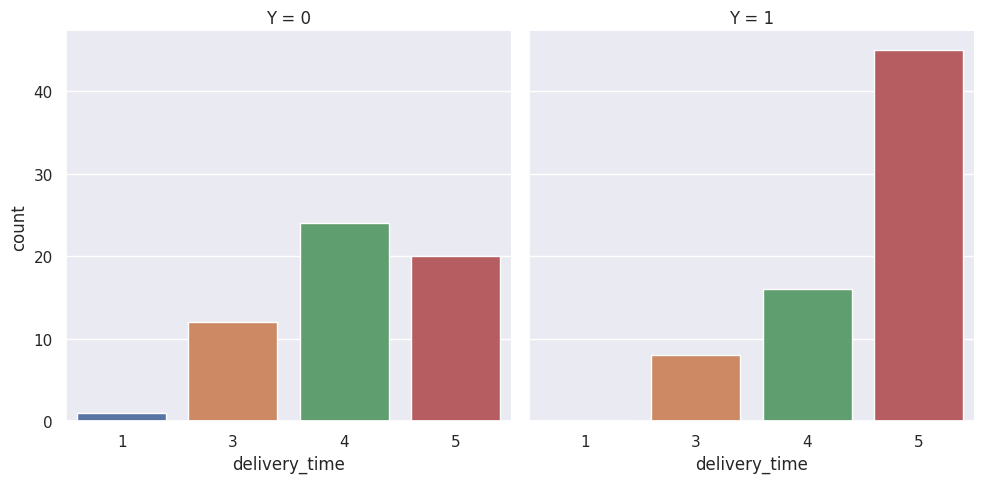

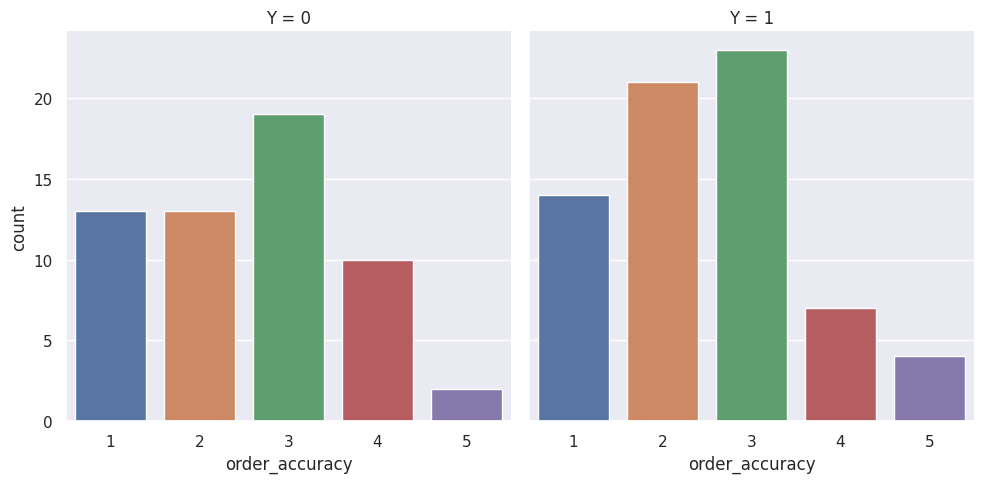

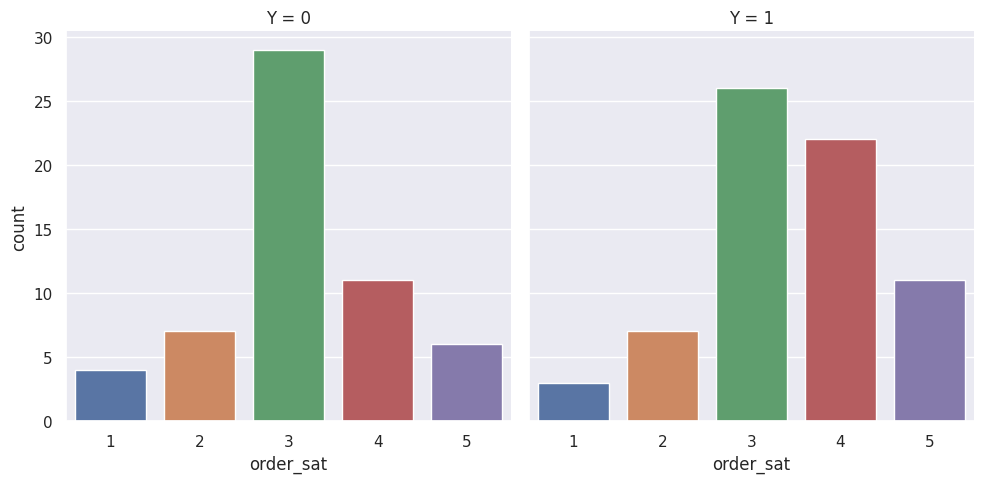

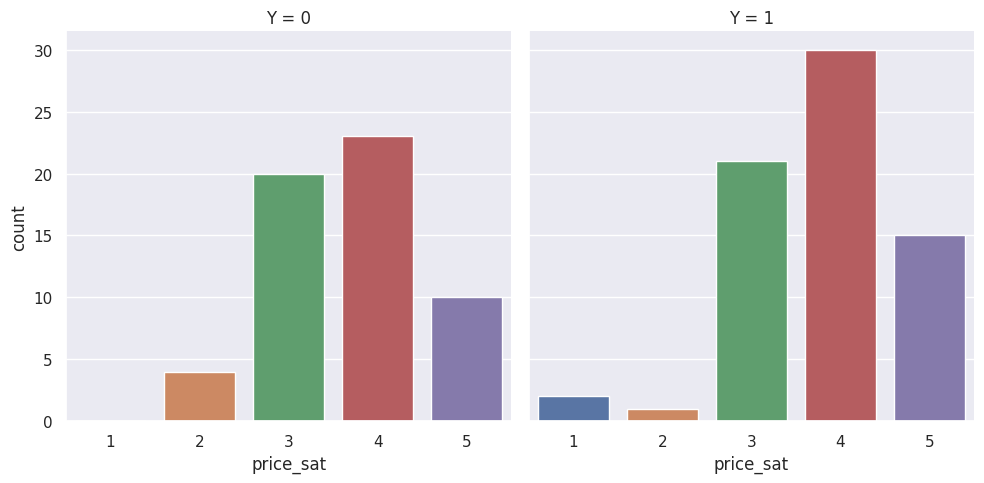

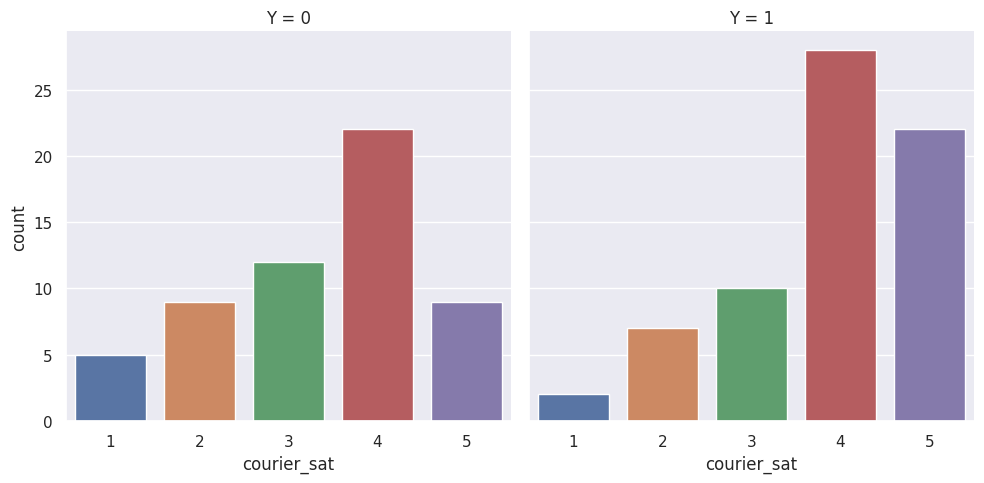

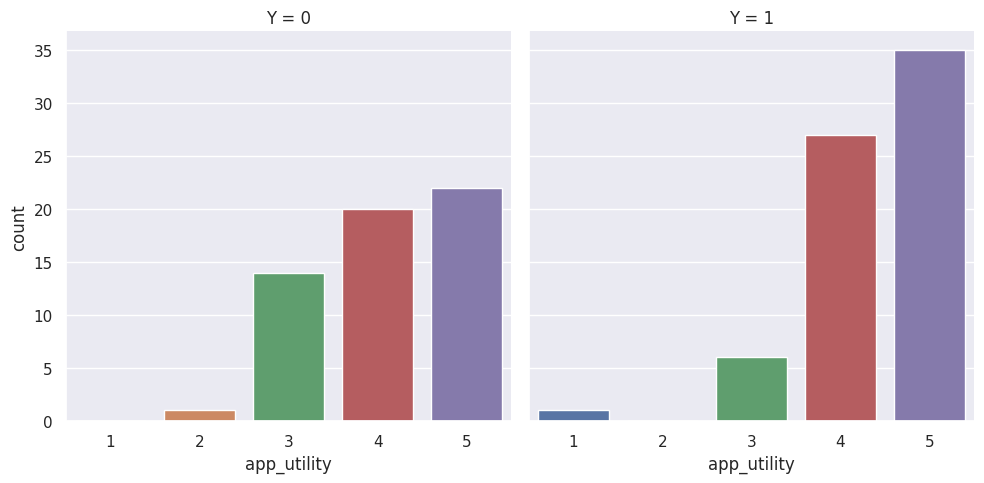

In [ ]:
sns.set_theme(style="darkgrid")
for i in df.columns[1:]:
  sns.catplot(x=i, col='Y', data=df, kind='count')
  plt.show()





<Axes: xlabel='Y', ylabel='count'>

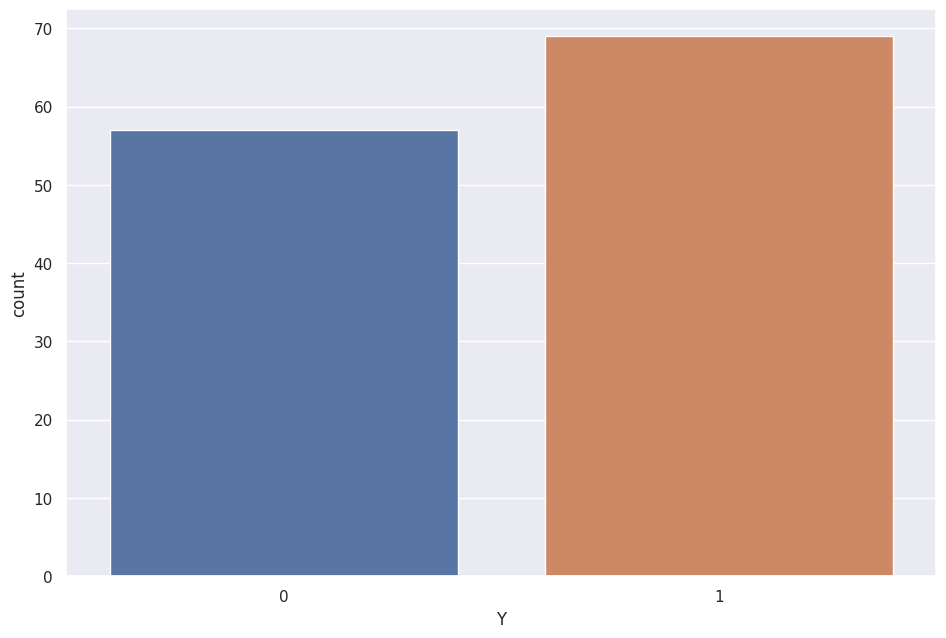

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='Y', data=df)




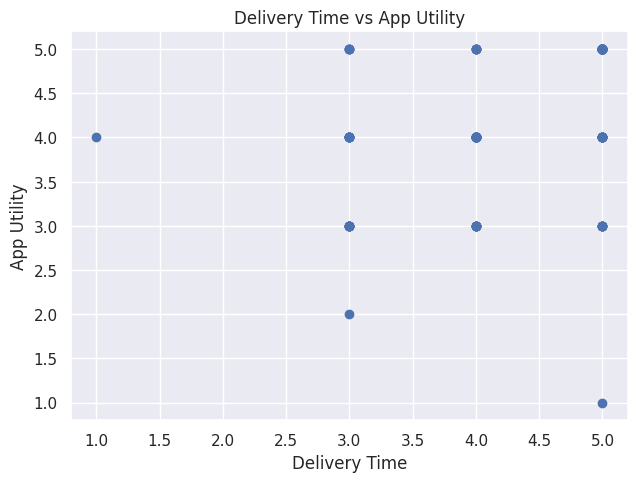

In [ ]:
plt.scatter(df['delivery_time'], df['app_utility'])
plt.title('Delivery Time vs App Utility')
plt.xlabel('Delivery Time')
plt.ylabel('App Utility')
plt.show()





In [ ]:
from sklearn.utils import resample


In [ ]:
df_majority = df[df['Y']==1]
df_minority = df[df['Y']==0]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=df_majority.shape[0], random_state=123)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled['Y'].value_counts()

1    69
0    69
Name: Y, dtype: int64

<Axes: >

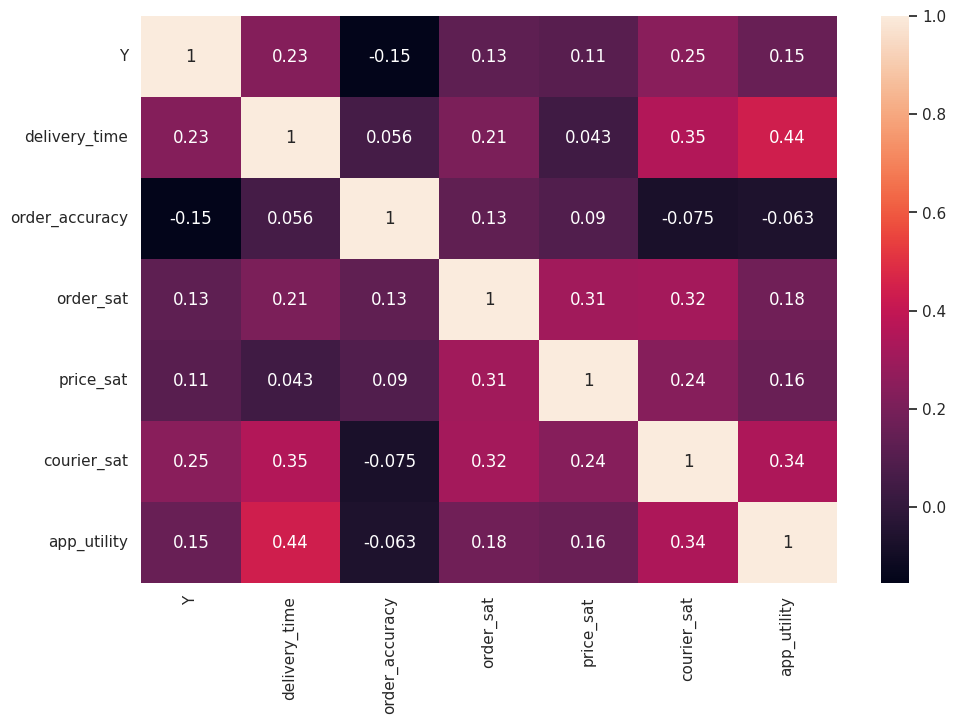

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df_upsampled.corr(), annot=True)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline


In [ ]:
X = df_upsampled.drop('Y', axis=1)
y = df_upsampled['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((110, 6), (28, 6), (110,), (28,))

In [ ]:
lr = LogisticRegression()
lr_pipeline = Pipeline([('scaler', StandardScaler()), ('lr', lr)])
lr_pipeline.fit(X_train, y_train)
lr_pipeline.score(X_test, y_test)

0.6071428571428571

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(lr_pipeline, x, y, score_func=accuracy_score):
  kf = KFold(n_splits=5, shuffle=True, random_state=4)
  scores = []
  for train_idx, test_idx in kf.split(x):
    lr_pipeline.fit(x.iloc[train_idx], y.iloc[train_idx])
    score = score_func(y.iloc[test_idx], lr_pipeline.predict(x.iloc[test_idx]))
    scores.append(score)
  return np.mean(scores)

In [ ]:
lr = LogisticRegression()
cv_score(lr_pipeline, X, y)

0.6224867724867725

In [ ]:
# grid parameters to search over for best C
Cs = [0.001, 0.01, 0.1, 1, 10]

for C in Cs:
  lr = LogisticRegression(C=C)
  cv_score(lr_pipeline, X, y)
  score_info = [C, cv_score(lr_pipeline, X, y)]
  print(score_info)

[0.001, 0.6224867724867725]
[0.01, 0.6224867724867725]
[0.1, 0.6224867724867725]
[1, 0.6224867724867725]
[10, 0.6224867724867725]


In [ ]:
from sklearn.model_selection import GridSearchCV

g = GridSearchCV(lr_pipeline, param_grid={'lr__C': Cs}, cv=5)
g.fit(X_train, y_train)
print('Tuned Logistic Regression Parameters: {}'.format(g.best_params_))
print('Best score is {}'.format(g.best_score_))





Tuned Logistic Regression Parameters: {'lr__C': 0.01}
Best score is 0.5909090909090909


In [ ]:
rf = RandomForestClassifier()
rf_pipeline = Pipeline([('scaler', StandardScaler()), ('rf', rf)])
rf_pipeline.fit(X_train, y_train)
rf_pipeline.score(X_test, y_test)


0.6785714285714286

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(y_test, rf_pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.77      0.62      0.69        16

    accuracy                           0.68        28
   macro avg       0.68      0.69      0.68        28
weighted avg       0.70      0.68      0.68        28



In [ ]:
rf = RandomForestClassifier(random_state=45)
rf_pipeline = Pipeline([('scaler', StandardScaler()), ('rf', rf)])
rf_pipeline.fit(X_train, y_train)
rf_pipeline.score(X_test, y_test)


0.6785714285714286

In [ ]:
param_grid = {'n_estimators': np.arange(100, 500, step=100),
              'max_depth': np.arange(1, 10, step=1)}


In [ ]:
rf_g = GridSearchCV(estimator = RandomForestClassifier(), param_grid=param_grid, cv=5,
                    verbose = 1,
                    refit=True,
                    n_jobs=1,
                    scoring='accuracy')
rf_g.fit(X_train, y_train)

print('Tuned Random Forest Parameters: {}'.format(rf_g.best_params_))
print('Best score is {}'.format(rf_g.best_score_))



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Tuned Random Forest Parameters: {'max_depth': 8, 'n_estimators': 100}
Best score is 0.6636363636363636


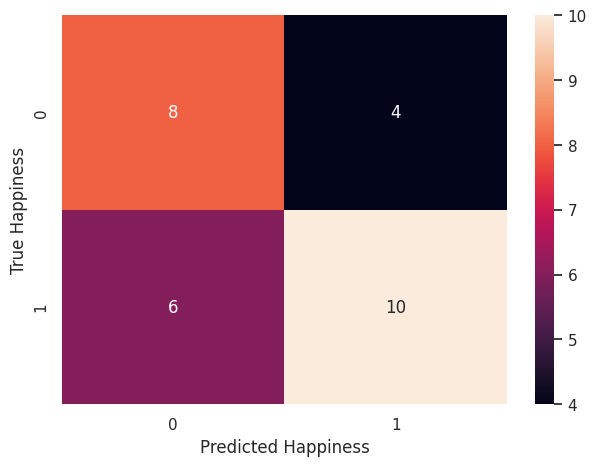

In [ ]:
rf_matrix = confusion_matrix(y_test, rf_g.predict(X_test))
sns.heatmap(rf_matrix, annot=True)
plt.xlabel('Predicted Happiness')
plt.ylabel('True Happiness')
plt.show()


In [ ]:
rf_imp = rf_g.best_estimator_.feature_importances_
rf_imp_df = pd.DataFrame(rf_imp, index=X_train.columns, columns=['importance'])
rf_imp_df.sort_values('importance', ascending=False)



,importance
courier_sat,0.206821
order_sat,0.205505
order_accuracy,0.192706
price_sat,0.171331
delivery_time,0.120142
app_utility,0.103494


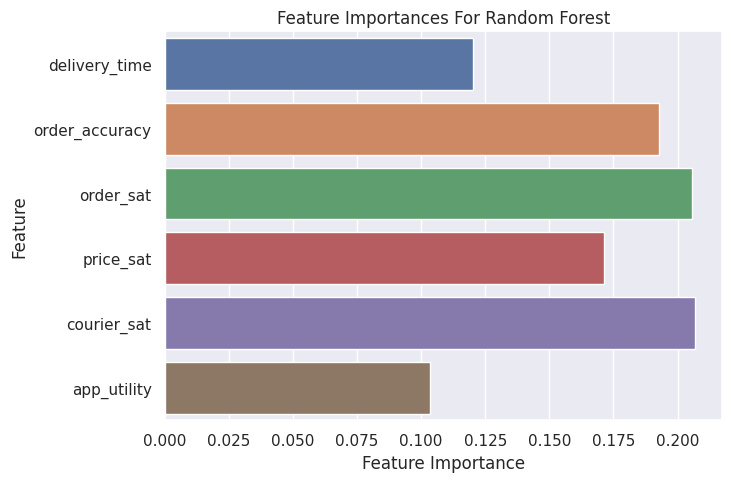

In [ ]:
sns.barplot(x=rf_imp, y=X_train.columns)
plt.title(label='Feature Importances For Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Feature' )
plt.show()



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

In [ ]:
rates = np.arange(0, 2, 0.1)
for rate in rates:
  gb =  GradientBoostingClassifier(learning_rate=rate, max_depth=2, n_estimators=15, random_state=9)
  gb.fit(X_train, y_train)
  print('Learning rate: ', rate)
  print('Accuracy score (training): {0:.3f}'.format(gb.score(X_train, y_train)))
  print('Accuracy score (validation): {0:.3f}'.format(gb.score(X_test, y_test)))
  print()

Learning rate:  0.0
Accuracy score (training): 0.518
Accuracy score (validation): 0.429

Learning rate:  0.1
Accuracy score (training): 0.773
Accuracy score (validation): 0.679

Learning rate:  0.2
Accuracy score (training): 0.745
Accuracy score (validation): 0.679

Learning rate:  0.30000000000000004
Accuracy score (training): 0.755
Accuracy score (validation): 0.714

Learning rate:  0.4
Accuracy score (training): 0.809
Accuracy score (validation): 0.643

Learning rate:  0.5
Accuracy score (training): 0.800
Accuracy score (validation): 0.643

Learning rate:  0.6000000000000001
Accuracy score (training): 0.827
Accuracy score (validation): 0.679

Learning rate:  0.7000000000000001
Accuracy score (training): 0.845
Accuracy score (validation): 0.679

Learning rate:  0.8
Accuracy score (training): 0.855
Accuracy score (validation): 0.750

Learning rate:  0.9
Accuracy score (training): 0.864
Accuracy score (validation): 0.607

Learning rate:  1.0
Accuracy score (training): 0.855
Accuracy sc

In [ ]:
gb = GradientBoostingClassifier(learning_rate=.3)
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.75

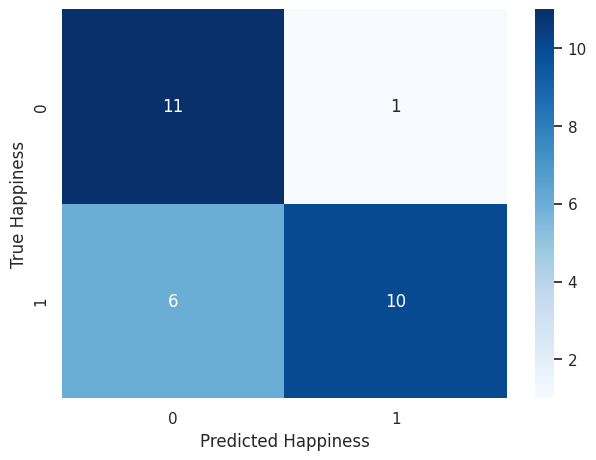

In [ ]:
sns.heatmap(confusion_matrix(y_test, gb.predict(X_test)), annot=True, cmap='Blues')
plt.xlabel('Predicted Happiness')
plt.ylabel('True Happiness')
plt.show()

In [ ]:
class_report = classification_report(y_test, gb.predict(X_test))
print(class_report)


              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.91      0.62      0.74        16

    accuracy                           0.75        28
   macro avg       0.78      0.77      0.75        28
weighted avg       0.80      0.75      0.75        28



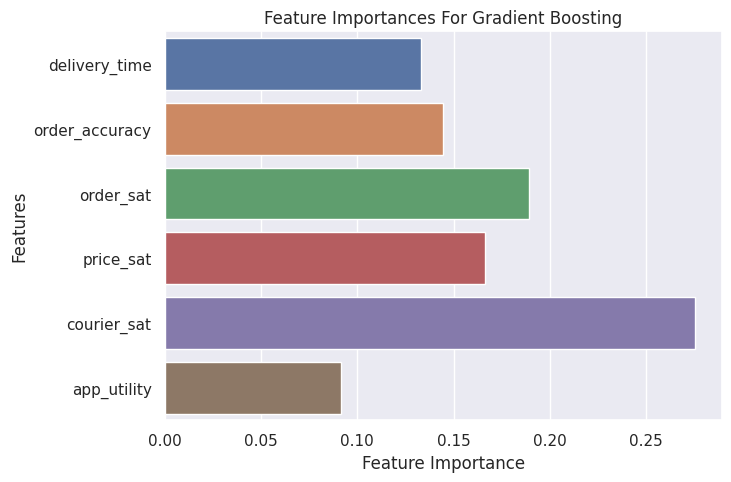

In [ ]:
sns.barplot(x=gb.feature_importances_, y=X_train.columns)
plt.title(label='Feature Importances For Gradient Boosting')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()